# Práctica Guiada de Laboratorio 4: Sistema Experto en CLIPS
# Curso "Inteligencia Artificial" Semestre 2025-1 - Sección 1 - EPISW

### Prof. Rolando A. Maguiña Pérez
### Abril 2025

## Introducción
En la Práctica a desarrollarse el 27 de Abril del presente, se presenta la herramienta llamada `CLIPS` (C Language Integrated Production System) que permite la construcción de sistemas expertos basados en regla. Con esta herramienta se pretende desarrollar un prototipo de sistema experto para el diagnóstico del COVID-19; no pretende ser un sistema totalmente funcional, por lo menos en el estadío actual, sin embargo para los fines que se persiguen en esta Práctica nos será útil.

En la parte final del cuaderno se plantean algunos ejercicios que deberán ser resueltos en grupos de 3 alumnos (como máximo).

## Objetivos de la Práctica
- Que los alumnos puedan conocer la programación en CLIPS a través de los ejms presentados y especialmente mediante la resolución de los ejercicios propuestos.
- Se espera que pueda servir de ayuda para el desarrollo del prototipo de sistema experto a ser solicitado probablemente en el Trabajo Computacional del presente curso.
  
## Preparativos de la Práctica
Para instalar CLIPS efectuar los sgts pasos:
- a) Descargar el Windows Installer Package “clips_windows_64_bit_executables_640” desde la carpeta compartida del curso a la carpeta C:\CLIPS.
- b) Ejecutar el archivo y seguir las instrucciones que aparecen en pantalla.
- c) Crear acceso directo en escritorio para el programa.

Los archivos CLIPS utilizan la extensión `.clp` y se pueden crear con cualquier editor de archivos de texto aunque se recomienda usar el editor del propio CLIPS.

Con la finalidad de observar el resultado de las acciones a efectuar, abra las ventanas `Agenda` y `Facts`. Para ello, elija `Facts (MAIN)` y `Agenda (MAIN)` de la opción `Window` que aparece en el menú principal.

## CLIPS
CLIPS es un lenguaje de programación basado en reglas desarrollado por la NASA en 1985. Es uno de los sistemas expertos más potentes y utilizados en el ámbito académico e industrial, especialmente diseñado para modelar conocimiento experto mediante reglas "si-entonces". Su motor de inferencia utiliza el algoritmo Rete, optimizado para evaluar eficientemente grandes conjuntos de reglas.

CLIPS permite crear sistemas expertos basados en reglas. Las reglas son una forma de representar los conocimientos del experto, constan normalmente de una parte condicional que, si se cumple, tiene como consecuencia la ejecución de una acción asociada. Cada vez que se aplica una de las reglas, los datos guardados en el sistema pueden variar, dando lugar a que se activen otras reglas que en la situación anterior no lo estaban. La resolución del problema planteado pasa por la aplicación sucesiva de reglas hasta que se llega a la condición de finalización. A este proceso se le denomina conducido por los datos o `encadenamiento progresivo`, ya que las acciones sólo se producen cuando hay datos que las justifican.

### Caracteres delimitadores
;  	Comentario
" 	Inicio o final de un string
( 	Inicio de una expresión
) 	Final de una expresión
?	Inicio de una variable comodín
$	Inicio de una variable multicampo

### Tipos de datos I
#### Numéricos
- Reales (FLOAT): Ej.: 1.5, -0.7, 3.5e-10
- Enteros (INTEGER): Ej.: 1, -1, +3, 65

#### Simbólicos
- Símbolos (SYMBOL): Cualquier secuencia de caracteres que no siga el formato de un número, excluyendo ciertos caracteres. Ej: casa, arbol, perro
- Cadenas (STRING): Cualquier secuencia de caracteres entre comillas. Ej: “Juan Molina”, “Casa del arbol”

### Tipos de datos II
Tipos de datos propios de CLIPS, permiten almacenar direcciones de los hechos, direcciones externas, instancias de nombres e instancias de direcciones
- Fact-address Direcciones de hechos
    - Lista de hechos: hechos referenciados por su posición o por un nombre.
    - Se imprime como <fact XXX> (XXX: índice del hecho en memoria)
- External-address Direcciones externas
    - Dirección de una estructura de datos externa devuelta por una función escrita en C o Ada, que ha sido integrada con CLIPS.
    - Se imprime como <pointer XXX>

### Constructores
Constructor: Permite al programador añadir elementos a la base de hechos y a la base de conocimiento (funciones, reglas, hechos, clases).

Los más importantes son:
- `deffunction`: Para definir funciones
- `defglobal`: Para definir variables globales
- `deftemplate`: Para definir plantillas
- `deffacts`: Para definir hechos
- `defrule`: Para definir reglas
- `defmodule`: Para definir módulos

Hay también constructores para definir objetos.

### Comandos
Comandos: Realizan acciones con efectos colaterales sin devolver valor alguno y son llamados entre paréntesis.

Algunos comandos:
- `(exit)`
- `(assert ...)`
- `(watch ...)`
- `(run)`
- `(reset)`
- `(clear)`




## Implementación del Sistema Experto en CLIPS
### Definición del Problema

Una de las aplicaciones más conocidas de los sistemas expertos es diagnóstico médico. En la presente Práctica se va a implementar un sistema de diagnóstico médico que, a partir de los síntomas del paciente, pueda determinar la enfermedad que padece y sugerir algunas recomendaciones.

Se va a implementar un sistema de diagnóstico médico que:
- Evalúe síntomas ingresados por el usuario.
- Infiera enfermedades basadas en reglas predefinidas.
- Priorice diagnósticos según gravedad (ej: COVID-19 sobre gripe).
- Genere recomendaciones personalizadas.


### Estructura de Datos (Deftemplate)


In [ ]:
(deftemplate sintoma
    (slot nombre (type SYMBOL))
)

(deftemplate enfermedad
    (slot nombre (type SYMBOL))
    (slot recomendacion (type STRING))
)

- `sintoma`: Define un hecho con un atributo nombre (ej: fiebre).
- `enfermedad`: Almacena diagnósticos con:
   - `nombre`: Identificador de la enfermedad.
   - `recomendacion`: Acción médica sugerida.

### Reglas de Diagnóstico (Defrule)

Cada regla sigue la estructura:
SI (condiciones) ENTONCES (acciones).

**Regla para Dengue**

In [ ]:
(defrule dengue
    (sintoma (nombre fiebre))
    (sintoma (nombre dolor_cabeza))
    (sintoma (nombre dolor_muscular))
    =>
    (assert (enfermedad (nombre dengue)
                        (recomendacion "Tomar paracetamol, hidratarse y evitar antiinflamatorios."))
    )
)

Condiciones: Presencia de fiebre + dolor de cabeza + dolor muscular.

Acción: Crea un hecho enfermedad con recomendaciones.

Regla para COVID-19 (con prioridad)
--------------------------------------

In [ ]:
(defrule Covid-19
    (sintoma (nombre fiebre))
    (sintoma (nombre tos))
    (sintoma (nombre perdida_olfato))
    (sintoma (nombre perdida_gusto))
    =>
    (assert (enfermedad (nombre COVID-19)
                        (recomendacion "Aislamiento inmediato, prueba PCR y consultar médico."))
    )
)

**Condición adicional:** `(not (enfermedad (nombre "COVID-19"))` en la regla de gripe evita diagnósticos contradictorios.

Regla para Alergia (con exclusión)
----------------------------------

In [ ]:
(defrule Alergia
    (sintoma (nombre estornudos))
    (sintoma (nombre ojos_rojos))
    (not (sintoma (nombre fiebre)))
    =>
    (assert (enfermedad (nombre alergia)
                        (recomendacion "Tomar cetirizina, hidratarse y si los sintomas persisten consultar médico."))
    )
)

`(not ...):` Descarta alergia si hay fiebre (sugiere infección).

Regla para Gripe (con exclusión)
----------------------------------

In [ ]:
(defrule Gripe
    (sintoma (nombre fiebre))
    (sintoma (nombre tos))
    (sintoma (nombre congestion_nasal))
    (not (sintoma (nombre perdida_olfato))) ; Diferenciador clave del COVID-19
    (not (enfermedad (nombre COVID-19)))    ; Prioridad a COVID-19 si está presente
    =>
    (assert (enfermedad (nombre gripe)
                        (recomendacion "Reposo, líquidos abundantes y antigripales comunes. Consultar si la fiebre persiste más de 3 días."))
    )
)

Interacción con el Usuario
----------------------------------------

In [ ]:
(deffunction preguntar-sintomas ()
    (printout t "Síntomas disponibles: fiebre, tos, ..." crlf)
    (bind ?sintoma (read))
    (while (neq ?sintoma "fin")
        (assert (sintoma (nombre ?sintoma)))
        (bind ?sintoma (read))
    )
)

Flujo:

Muestra síntomas posibles.

Lee entradas hasta que el usuario escriba "fin".

Crea hechos sintoma para cada entrada.

Ejecución del Sistema
---------------------------

In [ ]:
(reset)       ; Limpia la memoria de hechos
(preguntar-sintomas) ; Captura síntomas
(run)         ; Ejecuta las reglas

`Salida:`

Ejemplo para entrada: `"fiebre"`, `"tos"`, `"perdida_olfato"`]:`

In [ ]:
=== SISTEMA EXPERTO MÉDICO ===
Síntomas disponibles: fiebre, tos, dolor_cabeza, dolor_muscular, perdida_olfato, congestion_nasal, estornudos, ojos_rojos
fiebre
tos
perdida_olfato
perdida_gusto
fin

In [ ]:
(run)

In [ ]:
Diagnóstico: COVID-19 (Urgencia Máxima)

**Puntos Clave**

`Motor de Reglas:` CLIPS evalúa condiciones y ejecuta acciones cuando se cumplen.

`Priorización:` COVID-19 tiene precedencia sobre gripe gracias a (not ...).

`Extensibilidad:` Para añadir nuevas enfermedades, solo se necesitan nuevas reglas.

## Ejercicios

**Ejercicio 1: Añadir Síntomas Compuestos**

Modificar reglas para requerir **múltiples síntomas simultáneos**:

In [ ]:
(defrule dengue-grave
    (sintoma (nombre "fiebre"))
    (sintoma (nombre "dolor_cabeza"))
    (sintoma (nombre "sangrado_encias")) ; Nuevo síntoma
    =>
    (assert (enfermedad (nombre "dengue_hemorrágico")))
)

*Ejercicio desarrollado en archivo clp*

**Ejercicio 2: Integrar con Python**

Usar [pyclips](https://github.com/almostearthling/pyclips)  para ejecutar CLIPS desde Python:

In [ ]:
import clips

env = clips.Environment()

env.load("EXP-diagnostico.clp")

env.reset()

env.call("iniciar-diagnostico")

*Ejecutar en script iniciar_diagnostico.py*

**Ejercicio 3**
-----------------

Responder las sgtes preguntas


- **¿Cómo escalaría el sistema para 100+ enfermedades?**

### 1. Modularización del conocimiento
Organizar las reglas en módulos temáticos por categorías de enfermedades (respiratorias, digestivas, dermatológicas, etc.) utilizando el constructor `defmodule` de CLIPS. Esto permitiría:
- Mejor organización del código
- Mantenimiento más sencillo
- Carga selectiva de módulos según sea necesario

### 2. Implementación de jerarquías de diagnóstico
Crear un sistema de diagnóstico en múltiples etapas:
- Primera etapa: Clasificación general (sistema afectado)
- Segunda etapa: Análisis de síntomas específicos
- Tercera etapa: Diagnóstico diferencial entre enfermedades similares

### 3. Optimización de reglas
- Factorizar condiciones comunes para evitar duplicación
- Utilizar variables para patrones recurrentes
- Implementar patrones abstractos para síntomas relacionados

### 4. Indexación eficiente
- Asignar identificadores numéricos a los síntomas y enfermedades
- Usar estructuras de datos optimizadas como templates multislot
- Crear índices para búsquedas rápidas por grupos de síntomas

### 5. Meta-reglas y control de flujo
- Implementar reglas de control que determinen qué conjuntos de reglas evaluar
- Utilizar salience (prioridad) para establecer el orden de evaluación
- Crear reglas de meta-nivel que gestionen el proceso de diagnóstico

### 6. Gestión de memoria
- Retractar hechos innecesarios durante el proceso
- Utilizar hechos temporales solo cuando sean necesarios
- Implementar una estrategia de limpieza de la memoria de trabajo

### 7. Uso de plantillas estructuradas
- Expandir los templates con más información (gravedad, categorías, similitud)
- Implementar slots multivalor para agrupar síntomas relacionados
- Crear relaciones explícitas entre síntomas y enfermedades

### 8. Validación y pruebas
- Crear conjuntos de prueba para verificar cada módulo
- Implementar casos de diagnóstico conocidos para validación
- Desarrollar métricas de rendimiento para monitorear la eficiencia

### 9. Integración con bases de datos externas
- Cargar reglas y hechos desde archivos externos
- Implementar interfaces con bases de datos médicas
- Permitir actualizaciones sin modificar el código base


- **¿Qué ventajas tiene CLIPS sobre los sistemas expertos construidos en Python?**

### 1. Motor de inferencia optimizado
CLIPS proporciona un motor de inferencia especializado y optimizado específicamente para razonamiento basado en reglas, mientras que en Python habría que implementarlo desde cero o usar bibliotecas que no están tan especializadas para este propósito.

### 2. Algoritmo RETE eficiente
- CLIPS implementa el algoritmo RETE, diseñado específicamente para hacer coincidir patrones de manera eficiente
- Reduce la complejidad computacional al mantener una red de patrones
- Minimiza reevaluaciones innecesarias de condiciones que no han cambiado
- La implementación de este algoritmo en Python requeriría un esfuerzo de desarrollo significativo

### 3. Lenguaje declarativo especializado
- CLIPS permite expresar el conocimiento de forma declarativa y no procedimental
- Separa claramente el conocimiento (reglas) de la lógica de control
- Permite centrarse en "qué" debe hacerse en lugar de "cómo" hacerlo
- La sintaxis está diseñada específicamente para representar reglas if-then de manera concisa

### 4. Foco en el dominio del problema
- Permite al experto concentrarse en la representación del conocimiento
- Abstrae detalles de implementación del motor de inferencia
- Facilita la validación por expertos del dominio sin conocimientos extensos de programación

### 5. Madurez y estabilidad del sistema
- CLIPS cuenta con décadas de desarrollo, pruebas y optimización
- Ha sido probado en entornos reales exigentes (NASA)
- Tiene una base teórica sólida en inteligencia artificial simbólica
- Ofrece una implementación completa del razonamiento basado en reglas

### 6. Facilidad para representar heurísticas
- Representación natural de conocimiento heurístico
- Expresividad para capturar el conocimiento experto
- Facilidad para convertir directamente el conocimiento de expertos en reglas

### 7. Capacidades de explicación inherentes
- Facilita el seguimiento de las reglas activadas
- Permite explicar cómo se llegó a un diagnóstico específico
- Proporciona trazas de ejecución para auditoría

### 8. Rendimiento consistente
- Comportamiento predecible incluso con grandes bases de conocimiento
- Escalabilidad probada para sistemas complejos
- Optimizaciones específicas para patrones de coincidencia

### 9. Portabilidad
- Funciona en múltiples plataformas sin cambios
- No depende de bibliotecas externas o entornos específicos
- Fácil integración con otros lenguajes cuando sea necesario

### 10. Facilidad de mantenimiento a largo plazo
- Las reglas son autocontenidas y modulares
- Las bases de conocimiento son más fáciles de actualizar
- El código es más mantenible al separar conocimiento y control

- **Si en algunos dominios hay incertidumbre en el conocimiento involucrado, ¿cómo se podría manejar  dicha incertidumbre?**

En CLIPS, la incertidumbre se puede manejar usando valores de certeza asociados a hechos o reglas, aunque no es nativo del lenguaje. Para extenderlo, se puede implementar una lógica de pesos o factores de confianza dentro de las reglas (por ejemplo, agregando slots como confianza), o integrar CLIPS con lenguajes como Python para aplicar técnicas probabilísticas o difusas externas, como lógica difusa o redes bayesianas.

- **Capturas de pantalla de 3 ejecuciones diferentes (en este mismo cuaderno).**

Primera ejecución:

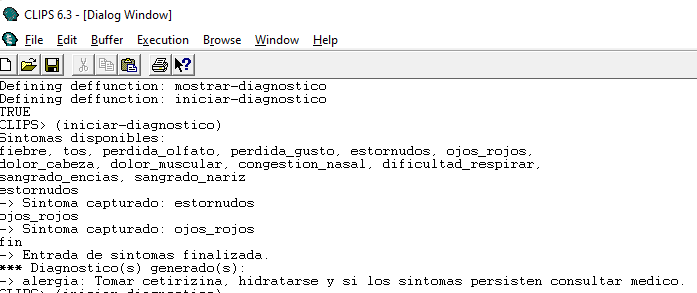

Segunda ejecución:

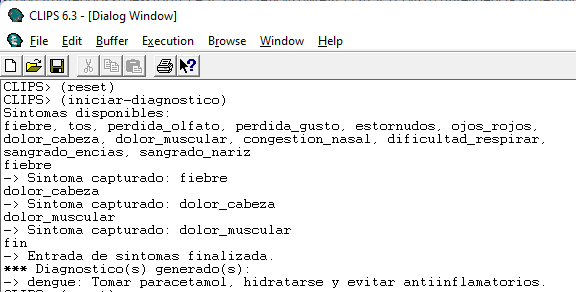

Tercera ejecución:

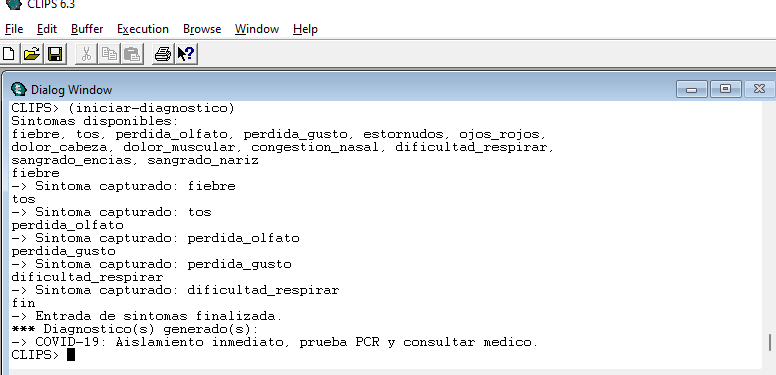

### Instrucciones para el envío de la solución
La solución de la "Práctica Guiada de Laboratorio 4 - IA 2024-1 G1 EPISW" deberá enviarse al correo electrónico rmaguinacursos@gmail.com, hasta las 23:59 h del Miércoles 30 de Abril del 2025, en un archivo con extensión .ipynb.

Entrega Requerida
1. Archivo .clp con el sistema experto completo.

2. Capturas de pantalla de 3 ejecuciones diferentes (en este mismo cuaderno).

3. Respuestas a las preguntas de análisis planteadas en el Ejercicio 3 (en este mismo cuaderno).

Los documentos deberá tener las sgtes características:
- Nombre del archivo:
  solPGL3_Parte1_IA_2024-1_G3_nombre-apellidos-alumno1_...nombre-apellidos-alumno3.ipynb.